## Cleaning Data

In [85]:
#Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
df= pd.read_csv('../../Data/training.csv')
print ('shape of df :' ,  df.shape)

shape of df : (95662, 16)


In [87]:
# Drop the columns that are not needed (CurrencyCode, CountryCode) same value for all rows
df.drop(['CurrencyCode', 'CountryCode'], axis=1, inplace=True)

# Drop the column 'TransactionId' because it is not needed each transaction has a unique Id
df.drop(['TransactionId'], axis=1, inplace=True)

# Isolate Date and Time from TransactionStartTime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['Date'] = df['TransactionStartTime'].dt.date
df['Time'] = df['TransactionStartTime'].dt.time
df.drop(['TransactionStartTime'], axis=1, inplace=True)
print ('\n ---------------- \n Shape \n',df.shape)


 ---------------- 
 Shape 
 (95662, 15)


In [88]:
# Remove text from cell values to get
df['AccountId'] = df['AccountId'].str.split('_').str[1] # split the string and get the 1th element
df['BatchId'] = df['BatchId'].str.split('_').str[1] 
df['SubscriptionId'] = df['SubscriptionId'].str.split('_').str[1] 
df['CustomerId'] = df['CustomerId'].str.split('_').str[1] 
df['ProviderId'] = df['ProviderId'].str.split('_').str[1] 
df['ProductId'] = df['ProductId'].str.split('_').str[1] 
df['ChannelId'] = df['ChannelId'].str.split('_').str[1] 

print (df.head())
print ('\n ---------------- \n Shape \n',df.shape)


print ('df["ProductCategory"].unique()', df["ProductCategory"].unique())

  BatchId AccountId SubscriptionId CustomerId ProviderId ProductId  \
0   36123      3957            887       4406          6        10   
1   15642      4841           3829       4406          4         6   
2   53941      4229            222       4683          6         1   
3  102363       648           2185        988          1        21   
4   38780      4841           3829        988          4         6   

      ProductCategory ChannelId   Amount  Value      TransactionStartTime  \
0             airtime         3   1000.0   1000 2018-11-15 02:18:49+00:00   
1  financial_services         2    -20.0     20 2018-11-15 02:19:08+00:00   
2             airtime         3    500.0    500 2018-11-15 02:44:21+00:00   
3        utility_bill         3  20000.0  21800 2018-11-15 03:32:55+00:00   
4  financial_services         2   -644.0    644 2018-11-15 03:34:21+00:00   

   PricingStrategy  FraudResult        Date      Time  
0                2            0  2018-11-15  02:18:49  
1   

In [90]:
# Normalize the column 'TransactionStartTime' to get the hour of the day
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime']) # convert to datetime
df['TransactionStartTime'] = df['TransactionStartTime'].dt.hour # get the hour of the day
print (df.head())
print ('\n ---------------- \n Shape \n',df.shape)

  BatchId AccountId SubscriptionId CustomerId ProviderId ProductId  \
0   36123      3957            887       4406          6        10   
1   15642      4841           3829       4406          4         6   
2   53941      4229            222       4683          6         1   
3  102363       648           2185        988          1        21   
4   38780      4841           3829        988          4         6   

      ProductCategory ChannelId   Amount  Value  TransactionStartTime  \
0             airtime         3   1000.0   1000                     2   
1  financial_services         2    -20.0     20                     2   
2             airtime         3    500.0    500                     2   
3        utility_bill         3  20000.0  21800                     3   
4  financial_services         2   -644.0    644                     3   

   PricingStrategy  FraudResult        Date      Time  
0                2            0  2018-11-15  02:18:49  
1                2          

In [91]:
# find the columns that have missing values
print ('df.isnull().sum()\n', df.isnull().sum())


df.isnull().sum()
 BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
Date                    0
Time                    0
dtype: int64


In [92]:
# register in a new df for an Ordinal Encoding 
df_ord = df.copy()

# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()


df_ord["ProductCategory"] = ord_enc.fit_transform(df_ord[["ProductCategory"]])


print (df_ord.head())
print ('\n ---------------- \n Shape \n',df_ord.shape)

  BatchId AccountId SubscriptionId CustomerId ProviderId ProductId  \
0   36123      3957            887       4406          6        10   
1   15642      4841           3829       4406          4         6   
2   53941      4229            222       4683          6         1   
3  102363       648           2185        988          1        21   
4   38780      4841           3829        988          4         6   

   ProductCategory ChannelId   Amount  Value  TransactionStartTime  \
0              0.0         3   1000.0   1000                     2   
1              2.0         2    -20.0     20                     2   
2              0.0         3    500.0    500                     2   
3              8.0         3  20000.0  21800                     3   
4              2.0         2   -644.0    644                     3   

   PricingStrategy  FraudResult        Date      Time  
0                2            0  2018-11-15  02:18:49  
1                2            0  2018-11-15  0

In [93]:
# register in a new df for an One Hot Encoding
df_onehot = df.copy()

# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(sparse=False)

df_onehot["ProductCategory"] = onehot_enc.fit_transform(df_onehot[["ProductCategory"]])


print (df_onehot.head())

  BatchId AccountId SubscriptionId CustomerId ProviderId ProductId  \
0   36123      3957            887       4406          6        10   
1   15642      4841           3829       4406          4         6   
2   53941      4229            222       4683          6         1   
3  102363       648           2185        988          1        21   
4   38780      4841           3829        988          4         6   

   ProductCategory ChannelId   Amount  Value  TransactionStartTime  \
0              1.0         3   1000.0   1000                     2   
1              0.0         2    -20.0     20                     2   
2              1.0         3    500.0    500                     2   
3              0.0         3  20000.0  21800                     3   
4              0.0         2   -644.0    644                     3   

   PricingStrategy  FraudResult        Date      Time  
0                2            0  2018-11-15  02:18:49  
1                2            0  2018-11-15  0

/Users/dave/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [94]:
df_ord_diff_values_amount = df_ord.copy()

# Create a new column with the difference between the amount and the value
df_ord_diff_values_amount['(Amount-Value)'] = df_ord_diff_values_amount['Amount'] - df_ord_diff_values_amount['Value']
# Force object values to be numeric
df_ord_diff_values_amount = df_ord_diff_values_amount.apply(pd.to_numeric, errors='coerce') # coerce -> invalid parsing will be set as NaN


In [95]:
#print ("\n ---------------------  \n Before changing object to num", df_ord.info())
# Force object values to be numeric
df_ord = df_ord.apply(pd.to_numeric, errors='coerce') # coerce -> invalid parsing will be set as NaN

print ("\n ---------------------  \n After changing object to num", df_ord.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BatchId               95662 non-null  int64  
 1   AccountId             95662 non-null  int64  
 2   SubscriptionId        95662 non-null  int64  
 3   CustomerId            95662 non-null  int64  
 4   ProviderId            95662 non-null  int64  
 5   ProductId             95662 non-null  int64  
 6   ProductCategory       95662 non-null  float64
 7   ChannelId             95662 non-null  int64  
 8   Amount                95662 non-null  float64
 9   Value                 95662 non-null  int64  
 10  TransactionStartTime  95662 non-null  int64  
 11  PricingStrategy       95662 non-null  int64  
 12  FraudResult           95662 non-null  int64  
 13  Date                  0 non-null      float64
 14  Time                  0 non-null      float64
dtypes: float64(4), int6

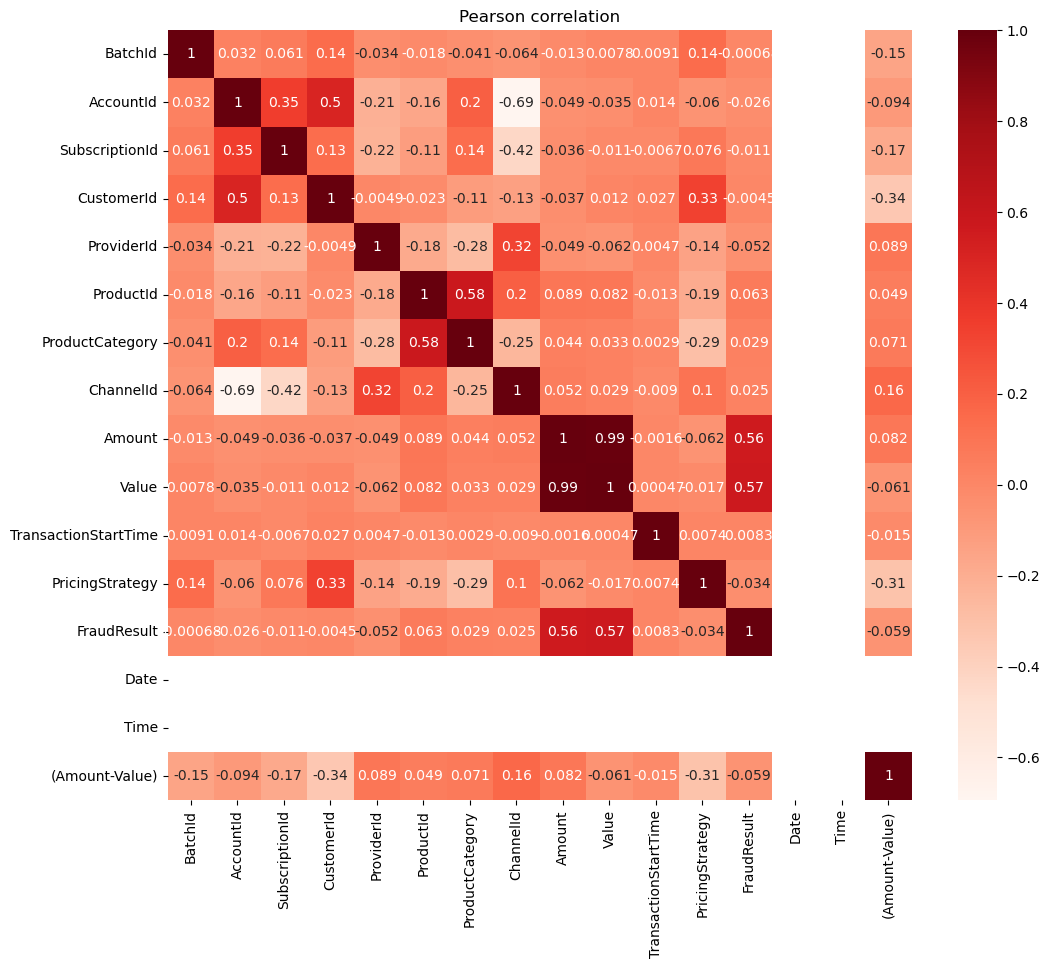

<Figure size 640x480 with 0 Axes>

In [96]:


# Find the correlation between features and the target variable Class using Pearson correlation method
plt.figure(figsize=(12,10))
cor = df_ord_diff_values_amount.corr('pearson')
import seaborn as sns
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Pearson correlation')
plt.show()
# Save plots as png
plt.savefig('../Report/images/correlation-pearson.png')

# Find the correlation between features and the target variable Class using Spearman correlation method
# plt.figure(figsize=(12,10))
# cor = df_ord_diff_values_amount.corr(method='spearman')
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.title('Spearman correlation')
# plt.show()

# Save plots as png
#plt.savefig('../../Data/correlation-spearman.png')





In [97]:
# from scipy import stats

# # Normalize the data
# from sklearn.preprocessing import MinMaxScaler
# normalized_data = stats.boxcox(df_ord_diff_values_amount)


# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_ord_diff_values_amount = scaler.fit_transform(df_ord_diff_values_amount)


/Users/dave/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/dave/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/Users/dave/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [98]:

# let's have PCA study on df_ord to describe the data

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
X = StandardScaler().fit_transform(df_ord.drop(['FraudResult'], axis=1))
y = df_ord['FraudResult']

# PCA
pca = PCA()
principalComponents = pca.fit_transform(X)
# = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3',])
#print (principalDf.head())

print('Explained variance ratio:', pca.explained_variance_ratio_)

plt.scatter(principalComponents[:, 0], principalComponents[:, 1] , c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


/Users/dave/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/dave/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/Users/dave/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Save df_ord in a csv file
df_ord.to_csv('../../Data/cleaned_data.csv', index=False)
